## Quick Start Tutorial - Distinctiveness Centrality (Python)
**More info here https://github.com/iandreafc/distinctiveness-centrality**

### Installation
``` python
pip install distinctiveness
```

In [1]:
# Import
from distinctiveness.dc import dc_all

#Import Networkx and Pandas
import networkx as nx
import pandas as pd

### Undirected graphs

In [2]:
#Create a Toy Network
G= nx.Graph()
G.add_edge("A","E", weight = 5)
G.add_edge("A","B", weight = 2)
G.add_edge("B","F", weight = 5)
G.add_edge("B","C", weight = 2)
G.add_edge("B","D", weight = 2)
G.add_edge("C","D", weight = 5)
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels = True,node_color='#00c0ff')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

{('A', 'E'): Text(-0.7912955771199095, -0.031211611782127602, '5'),
 ('A', 'B'): Text(-0.2155349074165191, 0.03925553892069393, '2'),
 ('B', 'F'): Text(0.18599700436678585, 0.29427771629287836, '5'),
 ('B', 'C'): Text(0.3286643784753497, -0.15190341796368306, '2'),
 ('B', 'D'): Text(0.4281555336845552, -0.030591050743929885, '2'),
 ('C', 'D'): Text(0.6052985727531239, -0.26306610451075046, '5')}

In [3]:
#Calculate the 5 metrics of Distinctiveness Centrality
#If normalized == True, values are divided by their upper bound, to allow a comparison with different networks
#alpha is a coefficient that can be chosen to penalize more connections with high-degree nodes, default is alpha = 1
DC = dc_all(G, normalize = False, alpha = 1)
DC

{'D1': {'A': 0.19382002601611284,
  'E': 1.989700043360188,
  'B': 0.7958800173440752,
  'F': 0.4845500650402821,
  'C': 1.989700043360188,
  'D': 1.989700043360188},
 'D2': {'A': 0.09691001300805642,
  'E': 0.3979400086720376,
  'B': 0.3979400086720376,
  'F': 0.09691001300805642,
  'C': 0.3979400086720376,
  'D': 0.3979400086720376},
 'D3': {'A': 0.6444385894678386,
  'E': 4.225490200071284,
  'B': 1.0881360887005513,
  'F': 2.385606273598312,
  'C': 4.225490200071284,
  'D': 4.225490200071284},
 'D4': {'A': 0.36363636363636365,
  'E': 3.5714285714285716,
  'B': 0.5714285714285714,
  'F': 2.2727272727272725,
  'C': 3.5714285714285716,
  'D': 3.5714285714285716},
 'D5': {'A': 0.25, 'E': 0.5, 'B': 0.5, 'F': 0.25, 'C': 0.5, 'D': 0.5},
 'D1_in': nan,
 'D2_in': nan,
 'D3_in': nan,
 'D4_in': nan,
 'D5_in': nan,
 'D1_out': nan,
 'D2_out': nan,
 'D3_out': nan,
 'D4_out': nan,
 'D5_out': nan}

In [4]:
#When alpha > 1 negative values are possible
DC = dc_all(G, normalize = True, alpha = 2)
#Select one metric
D1 = DC["D1"]
D1

{'A': -0.05781649858348577,
 'E': 0.02772937677064278,
 'B': 0.011091750708257112,
 'F': -0.1445412464587144,
 'C': 0.02772937677064278,
 'D': 0.02772937677064278}

### Directed graphs

{('A', 'E'): Text(-0.022446493930112818, -0.7221578854322187, '5'),
 ('A', 'B'): Text(0.10694281664338864, -0.5149072721523582, '6'),
 ('B', 'A'): Text(-0.004820070350523092, -0.6090438532343383, '2'),
 ('B', 'F'): Text(0.32236493558490875, -0.03865722319016572, '5'),
 ('B', 'C'): Text(0.14419905202881278, 0.25495168970436444, '2'),
 ('B', 'D'): Text(-0.20016717043721216, 0.4693463560046407, '2'),
 ('C', 'D'): Text(-0.32434686283881176, 0.8570702224664825, '3'),
 ('D', 'C'): Text(-0.20955812201680343, 0.7856053336997237, '5')}

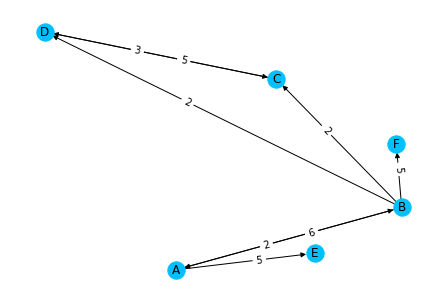

In [5]:
#Create a Toy Network
G= nx.DiGraph()
G.add_edge("A","E", weight = 5)
G.add_edge("A","B", weight = 6)
G.add_edge("B","A", weight = 2)
G.add_edge("B","F", weight = 5)
G.add_edge("B","C", weight = 2)
G.add_edge("B","D", weight = 2)
G.add_edge("C","D", weight = 3)
G.add_edge("D","C", weight = 5)
pos = nx.spiral_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels = True,node_color='#00c0ff')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, label_pos=0.4)

In [6]:
#In directed graphs each metric has an '_in' and '_out' suffix (see the docs)
DC = dc_all(G, normalize = False, alpha = 2)
DC = pd.DataFrame(DC).sort_index()
DC

,D1,D2,D3,D4,D5,D1_in,D2_in,D3_in,D4_in,D5_in,D1_out,D2_out,D3_out,D4_out,D5_out
A,NaN,NaN,NaN,NaN,NaN,-1.01030,-0.50515,-1.189522,0.066116,0.0625,4.19382,0.69897,8.862728,6.00000,1.00
B,NaN,NaN,NaN,NaN,NaN,0.58146,0.09691,-2.744263,1.785124,0.2500,0.19382,0.09691,0.269397,0.32000,0.25
C,NaN,NaN,NaN,NaN,NaN,3.49485,0.69897,7.385606,5.000000,1.0000,0.29073,0.09691,0.740017,1.08000,0.25
D,NaN,NaN,NaN,NaN,NaN,2.09691,0.69897,4.431364,3.000000,1.0000,0.48455,0.09691,0.395906,2.55102,0.25
E,NaN,NaN,NaN,NaN,NaN,0.48455,0.09691,-2.548252,1.033058,0.2500,0.00000,0.00000,0.000000,0.00000,0.00
F,NaN,NaN,NaN,NaN,NaN,-2.52575,-0.50515,-2.548252,1.033058,0.0625,0.00000,0.00000,0.000000,0.00000,0.00
